In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import json

df_data = pd.read_csv('../data/ogd32_elektrizitaetbilanz_jahreswerte.csv', sep=',', encoding='utf-16')
display(df_data)

,Jahr,Erzeugung_laufwerk_GWh,Erzeugung_speicherwerk_GWh,Erzeugung_kernkraftwerk_GWh,Erzeugung_andere_total_GWh,Erzeugung_andere_fossil_GWh,Erzeugung_andere_erneuerbare_abfaelle_GWh,Erzeugung_holz_GWh,Erzeugung_biogas_GWh,Erzeugung_photovoltaik_GWh,Erzeugung_wind_GWh,Verbrauch_speicherpumpen_GWh,Erzeugung_netto_GWh,Einfuhr_GWh,Ausfuhr_GWh,Landesverbrauch_GWh,Verluste_GWh,Endverbrauch_GWh
0,1960,NaN,NaN,NaN,168,NaN,NaN,NaN,NaN,NaN,NaN,245,20427,1306,3822,17911,2020,15891
1,1961,NaN,NaN,NaN,174,NaN,NaN,NaN,NaN,NaN,NaN,211,21489,1530,4249,18770,2029,16741
2,1962,NaN,NaN,NaN,231,NaN,NaN,NaN,NaN,NaN,NaN,327,21090,3184,4443,19831,2115,17716
3,1963,NaN,NaN,NaN,254,NaN,NaN,NaN,NaN,NaN,NaN,358,22445,3419,5119,20745,2262,18483
4,1964,NaN,NaN,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,393,22015,4213,4662,21566,2220,19346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,17700.0,22856.0,25280.0,3050,1873.0,1177.0,313.0,372.0,2178.0,146.0,4133,67761,29505,35765,61501,4303,57198
60,2020,17648.0,22968.0,22990.0,2791,1607.0,1184.0,395.0,388.0,2599.0,145.0,4459,65464,26988,32548,59904,4190,55714
61,2021,16962.0,22538.0,18530.0,2320,1207.0,1113.0,475.0,403.0,2842.0,145.0,4145,60070,31532,29119,62483,4370,58113
62,2022,15490.0,18011.0,23113.0,1970,878.0,1092.0,505.0,408.0,3858.0,150.0,5567,57937,33117,29734,61320,4290,57030


In [54]:
df_data_einfuhr_ausfuhr = df_data[['Jahr', 'Einfuhr_GWh', 'Ausfuhr_GWh']]

display(df_data_einfuhr_ausfuhr)

df_data_einfuhr_ausfuhr.rename(columns={'Jahr': 'Year'}, inplace=True)
df_data_einfuhr_ausfuhr.rename(columns={'Einfuhr_GWh': 'Import'}, inplace=True)
df_data_einfuhr_ausfuhr.rename(columns={'Ausfuhr_GWh': 'Export'}, inplace=True)

highcharts_series = []
for column in df_data_einfuhr_ausfuhr.columns:
    series_data = {
        'name': column,
        'data': df_data_einfuhr_ausfuhr[column].fillna(0).tolist()  # Replace NaN with 0 for Highcharts
    }
    highcharts_series.append(series_data) 
    

with open('../public/data/einfuhr_ausfuhr.json', 'w') as json_file:
    json.dump(highcharts_series, json_file, indent=2)

,Jahr,Einfuhr_GWh,Ausfuhr_GWh
0,1960,1306,3822
1,1961,1530,4249
2,1962,3184,4443
3,1963,3419,5119
4,1964,4213,4662
...,...,...,...
59,2019,29505,35765
60,2020,26988,32548
61,2021,31532,29119
62,2022,33117,29734


/tmp/ipykernel_53606/2422424573.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_einfuhr_ausfuhr.rename(columns={'Jahr': 'Year'}, inplace=True)
/tmp/ipykernel_53606/2422424573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_einfuhr_ausfuhr.rename(columns={'Einfuhr_GWh': 'Import'}, inplace=True)
/tmp/ipykernel_53606/2422424573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_einfuhr_ausfuhr.rename(colum

In [55]:
df_data_erzeugung = df_data[[
    'Jahr', 
    'Erzeugung_laufwerk_GWh',
    'Erzeugung_speicherwerk_GWh',
    'Erzeugung_andere_erneuerbare_abfaelle_GWh',
    'Erzeugung_holz_GWh',
    'Erzeugung_biogas_GWh',
    'Erzeugung_photovoltaik_GWh',
    'Erzeugung_wind_GWh',
    'Erzeugung_andere_total_GWh',
    'Erzeugung_andere_fossil_GWh',
    'Erzeugung_kernkraftwerk_GWh',
]]

df_data_erzeugung = df_data_erzeugung[df_data['Jahr'] > 1970]

df_data_erzeugung.rename(columns={
    'Jahr': 'Year',
    'Erzeugung_laufwerk_GWh': 'hydropower (run-of-river)',
    'Erzeugung_speicherwerk_GWh': 'hydropower (storage)',
    'Erzeugung_andere_erneuerbare_abfaelle_GWh': 'other (renewable waste)',
    'Erzeugung_holz_GWh': 'wood',
    'Erzeugung_biogas_GWh': 'biogas',
    'Erzeugung_photovoltaik_GWh': 'photovoltaic',
    'Erzeugung_wind_GWh': 'wind',
    'Erzeugung_andere_total_GWh': 'other (total)',
    'Erzeugung_andere_fossil_GWh': 'other (fossil)',
    'Erzeugung_kernkraftwerk_GWh': 'nuclear power',
}, inplace=True)



df_data_erzeugung.head()

,Year,hydropower (run-of-river),hydropower (storage),other (renewable waste),wood,biogas,photovoltaic,wind,other (total),other (fossil),nuclear power
11,1971,11523.0,16040.0,NaN,NaN,NaN,NaN,NaN,2181,NaN,1843.0
12,1972,11218.0,14059.0,NaN,NaN,NaN,NaN,NaN,2371,NaN,4650.0
13,1973,12430.0,16395.0,NaN,NaN,NaN,NaN,NaN,2434,NaN,5896.0
14,1974,13252.0,15311.0,NaN,NaN,NaN,NaN,NaN,2117,NaN,6730.0
15,1975,14039.0,19935.0,NaN,NaN,NaN,NaN,NaN,1629,NaN,7391.0


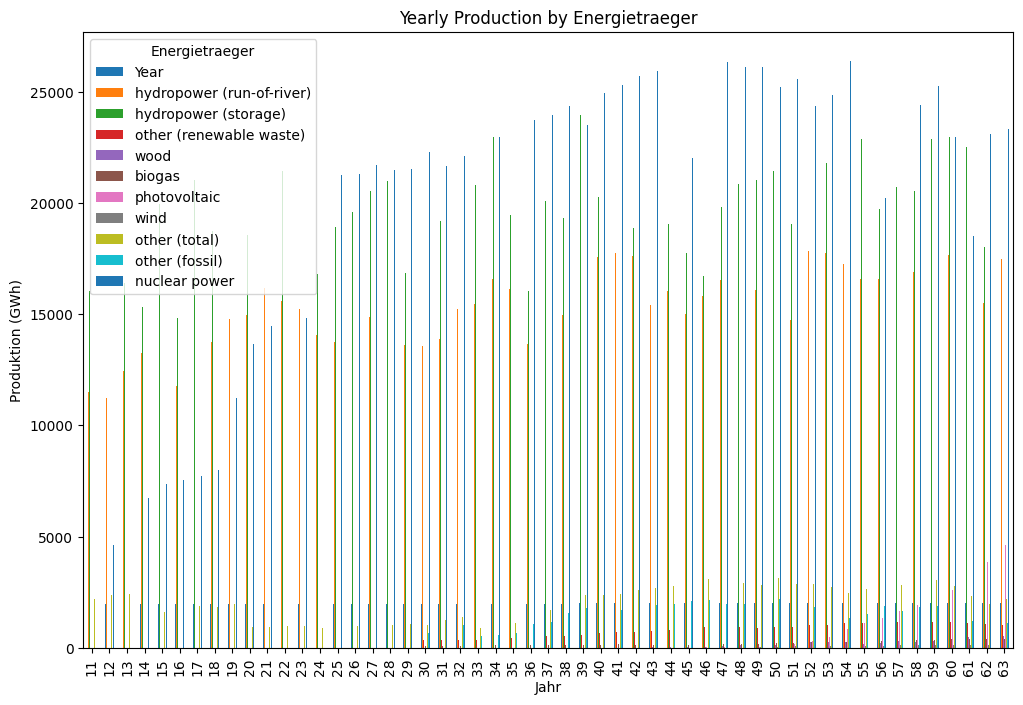

In [56]:
df_data_erzeugung.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Jahr')
plt.ylabel('Produktion (GWh)')
plt.title('Yearly Production by Energietraeger')
plt.legend(title='Energietraeger')
plt.show()

In [57]:
highcharts_series = []
for column in df_data_erzeugung.columns:
    series_data = {
        'name': column,
        'data': df_data_erzeugung[column].fillna(0).tolist()  # Replace NaN with 0 for Highcharts
    }
    highcharts_series.append(series_data)
    

with open('../public/data/erzeugung.json', 'w') as json_file:
    json.dump(highcharts_series, json_file, indent=2)

In [58]:
# Grouping columns
df_data_erzeugung_grouped = df_data_erzeugung.copy()

df_data_erzeugung_grouped['nuclear'] = df_data_erzeugung_grouped['nuclear power']
df_data_erzeugung_grouped['fossil'] = df_data_erzeugung_grouped['other (fossil)']
df_data_erzeugung_grouped['hydropower'] = (
    df_data_erzeugung_grouped['hydropower (run-of-river)'] +
    df_data_erzeugung_grouped['hydropower (storage)']
)
df_data_erzeugung_grouped['renewable'] = (
    df_data_erzeugung_grouped['other (renewable waste)'] +
    df_data_erzeugung_grouped['wood'] +
    df_data_erzeugung_grouped['biogas'] +
    df_data_erzeugung_grouped['photovoltaic'] +
    df_data_erzeugung_grouped['wind']
)

# Selecting only the grouped columns and the Year column
df_data_erzeugung_grouped = df_data_erzeugung_grouped[['Year', 'nuclear', 'fossil', 'renewable', 'hydropower']]

display(df_data_erzeugung_grouped)

highcharts_series = []

# Add the years as the first series
highcharts_series.append({
    'name': 'Year',
    'data': df_data_erzeugung_grouped['Year'].tolist()
})

# Add the grouped columns
for column in ['nuclear', 'fossil', 'renewable', 'hydropower']:
    series_data = {
        'name': column,
        'data': df_data_erzeugung_grouped[column].fillna(0).tolist()  # Replace NaN with 0 for Highcharts
    }
    highcharts_series.append(series_data)

with open('../public/data/erzeugung-grouped-1.json', 'w') as json_file:
    json.dump(highcharts_series, json_file, indent=2)

,Year,nuclear,fossil,renewable,hydropower
11,1971,1843.0,NaN,NaN,27563.0
12,1972,4650.0,NaN,NaN,25277.0
13,1973,5896.0,NaN,NaN,28825.0
14,1974,6730.0,NaN,NaN,28563.0
15,1975,7391.0,NaN,NaN,33974.0
16,1976,7561.0,NaN,NaN,26622.0
17,1977,7728.0,NaN,NaN,36290.0
18,1978,7995.0,NaN,NaN,32510.0
19,1979,11243.0,NaN,NaN,32345.0
20,1980,13663.0,NaN,NaN,33542.0


In [59]:
# Grouping columns
df_data_erzeugung_grouped['renewable'] = (
    df_data_erzeugung_grouped['renewable'] +
    df_data_erzeugung_grouped['hydropower'] 
    
)

# Selecting only the grouped columns and the Year column
df_data_erzeugung_grouped = df_data_erzeugung_grouped[['Year', 'renewable', 'fossil', 'nuclear']]

display(df_data_erzeugung_grouped)

highcharts_series = []

# Add the years as the first series
highcharts_series.append({
    'name': 'Year',
    'data': df_data_erzeugung_grouped['Year'].tolist()
})

# Add the grouped columns
for column in ['renewable', 'fossil', 'nuclear',]:
    series_data = {
        'name': column,
        'data': df_data_erzeugung_grouped[column].fillna(0).tolist()  # Replace NaN with 0 for Highcharts
    }
    highcharts_series.append(series_data)

with open('../public/data/erzeugung-grouped-2.json', 'w') as json_file:
    json.dump(highcharts_series, json_file, indent=2)

,Year,renewable,fossil,nuclear
11,1971,NaN,NaN,1843.0
12,1972,NaN,NaN,4650.0
13,1973,NaN,NaN,5896.0
14,1974,NaN,NaN,6730.0
15,1975,NaN,NaN,7391.0
16,1976,NaN,NaN,7561.0
17,1977,NaN,NaN,7728.0
18,1978,NaN,NaN,7995.0
19,1979,NaN,NaN,11243.0
20,1980,NaN,NaN,13663.0
